In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gapminder = px.data.gapminder()

In [4]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [5]:
gapminder.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [6]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


Text(0.5, 1.0, 'Histogram of Life Expectancy')

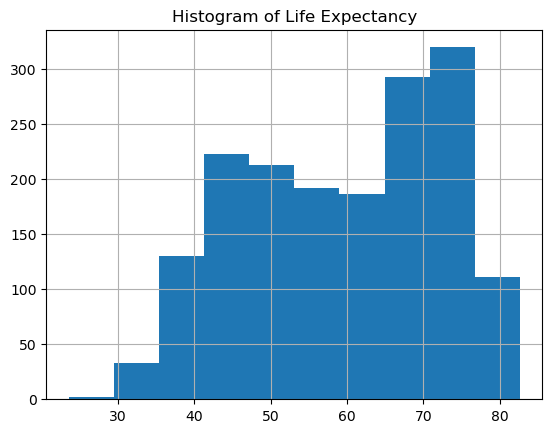

In [8]:
gapminder.hist("lifeExp")
plt.title("Histogram of Life Expectancy")

# plt.savefig("images/plot1.png")

<Axes: xlabel='gdpPercap', ylabel='continent'>

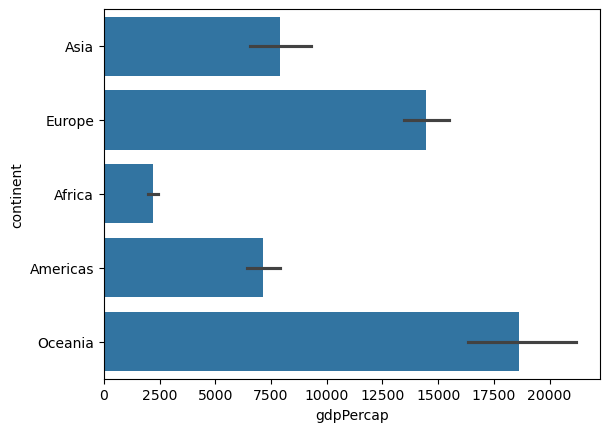

In [5]:
sns.barplot(x='gdpPercap', y='continent', data=gapminder)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Asia'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Africa'),
  Text(3, 0, 'Americas'),
  Text(4, 0, 'Oceania')])

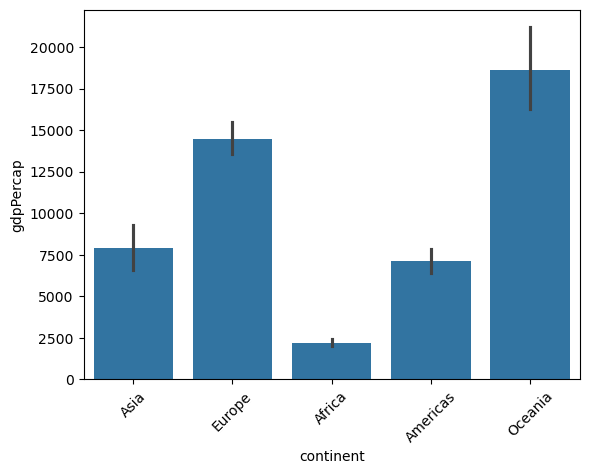

In [8]:
sns.barplot(y='gdpPercap', x='continent', data=gapminder)
plt.xticks(rotation=45)

<Axes: xlabel='gdpPercap', ylabel='lifeExp'>

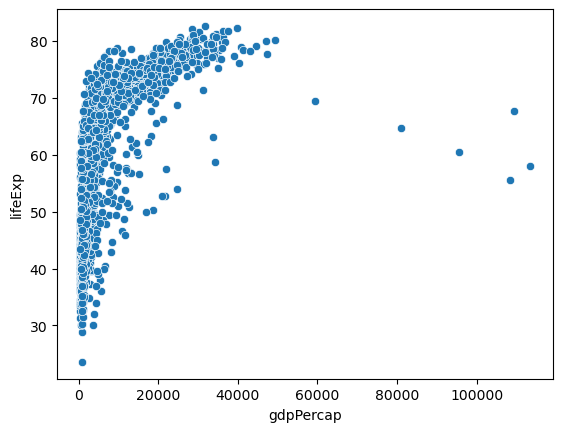

In [10]:
sns.scatterplot(x='gdpPercap', y='lifeExp', data=gapminder)

In [12]:
fig = px.bar(gapminder, x = "continent", y = "gdpPercap", color = "continent",
            color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [22]:
list_of_continents = ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
filtered_gapminder = gapminder[gapminder["continent"].isin(list_of_continents)]

# Here keep all the years for each country, no grouping to one row
fig = px.line(
    filtered_gapminder,
    x="year",
    y="gdpPercap",
    color="country",  # Color by country to get one line per country
    color_discrete_sequence=px.colors.qualitative.G10,
    title="GDP Per Capita Over Time by Country"
)
fig.update_layout(font_size=16)
fig.show()


In [24]:
px.line(gapminder.groupby("year")["gdpPercap"].agg("sum"))

In [25]:
px.line(gapminder.groupby("year")["gdpPercap"].agg("max"))

In [27]:
largest_gdps = gapminder.groupby("year")[["gdpPercap"]].agg('max')
smallest_gdps = gapminder.groupby("year")[["gdpPercap"]].agg('min')

In [28]:
ratio_of_largest_to_smallest = largest_gdps / smallest_gdps

In [29]:
ratio_of_largest_to_smallest

,gdpPercap
year,
1952,362.669321
1957,337.869368
1962,268.742242
1967,231.790496
1972,306.296546
1977,159.745221
1982,79.465036
1987,81.924610
1992,100.671238


In [30]:
def ratio_of_largest_to_smallest(s):
    largest = max(s)
    smallest = min(s)
    return largest / smallest

In [32]:
gapminder.groupby("year")[["gdpPercap"]].agg(ratio_of_largest_to_smallest)

,gdpPercap
year,
1952,362.669321
1957,337.869368
1962,268.742242
1967,231.790496
1972,306.296546
1977,159.745221
1982,79.465036
1987,81.924610
1992,100.671238


In [35]:
# DataFrame where each row corresponds to a year, showing the minimum value for each column in that year’s group
gapminder.groupby("year").agg('min')

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,,,,,,,
1952,Afghanistan,Africa,28.801,60011,298.846212,AFG,4
1957,Afghanistan,Africa,30.332,61325,335.997115,AFG,4
1962,Afghanistan,Africa,31.997,65345,355.203227,AFG,4
1967,Afghanistan,Africa,34.020,70787,349.000000,AFG,4
1972,Afghanistan,Africa,35.400,76595,357.000000,AFG,4
1977,Afghanistan,Africa,31.220,86796,371.000000,AFG,4
1982,Afghanistan,Africa,38.445,98593,424.000000,AFG,4
1987,Afghanistan,Africa,39.906,110812,385.000000,AFG,4
1992,Afghanistan,Africa,23.599,125911,347.000000,AFG,4


In [36]:
gapminder.groupby("year").agg({'lifeExp': 'min', 'gdpPercap': 'max'})

,lifeExp,gdpPercap
year,,
1952,28.801,108382.35290
1957,30.332,113523.13290
1962,31.997,95458.11176
1967,34.020,80894.88326
1972,35.400,109347.86700
1977,31.220,59265.47714
1982,38.445,33693.17525
1987,39.906,31540.97480
1992,23.599,34932.91959


In [37]:
gapminder.sort_values("gdpPercap")

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
334,"Congo, Dem. Rep.",Africa,2002,44.966,55379852,241.165876,COD,180
335,"Congo, Dem. Rep.",Africa,2007,46.462,64606759,277.551859,COD,180
876,Lesotho,Africa,1952,42.138,748747,298.846212,LSO,426
624,Guinea-Bissau,Africa,1952,32.500,580653,299.850319,GNB,624
333,"Congo, Dem. Rep.",Africa,1997,42.587,47798986,312.188423,COD,180
...,...,...,...,...,...,...,...,...
855,Kuwait,Asia,1967,64.624,575003,80894.883260,KWT,414
854,Kuwait,Asia,1962,60.470,358266,95458.111760,KWT,414
852,Kuwait,Asia,1952,55.565,160000,108382.352900,KWT,414
856,Kuwait,Asia,1972,67.712,841934,109347.867000,KWT,414


In [38]:
def get_first_item(s):
    return s.iloc[0]

gapminder.sort_values("gdpPercap").groupby("year").agg(get_first_item)

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,,,,,,,
1952,Lesotho,Africa,42.138,748747,298.846212,LSO,426
1957,Lesotho,Africa,45.047,813338,335.997115,LSO,426
1962,Burundi,Africa,42.045,2961915,355.203227,BDI,108
1967,Myanmar,Asia,49.379,25870271,349.000000,MMR,104
1972,Myanmar,Asia,53.070,28466390,357.000000,MMR,104
1977,Myanmar,Asia,56.059,31528087,371.000000,MMR,104
1982,Myanmar,Asia,58.056,34680442,424.000000,MMR,104
1987,Myanmar,Asia,58.339,38028578,385.000000,MMR,104
1992,Myanmar,Asia,59.320,40546538,347.000000,MMR,104


In [39]:
gapminder.sort_values("gdpPercap").groupby("year").first()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,,,,,,,
1952,Lesotho,Africa,42.138,748747,298.846212,LSO,426
1957,Lesotho,Africa,45.047,813338,335.997115,LSO,426
1962,Burundi,Africa,42.045,2961915,355.203227,BDI,108
1967,Myanmar,Asia,49.379,25870271,349.000000,MMR,104
1972,Myanmar,Asia,53.070,28466390,357.000000,MMR,104
1977,Myanmar,Asia,56.059,31528087,371.000000,MMR,104
1982,Myanmar,Asia,58.056,34680442,424.000000,MMR,104
1987,Myanmar,Asia,58.339,38028578,385.000000,MMR,104
1992,Myanmar,Asia,59.320,40546538,347.000000,MMR,104


In [40]:
indian_gdp_indexed_by_year = gapminder.query('country == "India"').set_index("year")

In [41]:
indian_gdp_indexed_by_year

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,,,,,,,
1952,India,Asia,37.373,372000000,546.565749,IND,356
1957,India,Asia,40.249,409000000,590.061996,IND,356
1962,India,Asia,43.605,454000000,658.347151,IND,356
1967,India,Asia,47.193,506000000,700.770611,IND,356
1972,India,Asia,50.651,567000000,724.032527,IND,356
1977,India,Asia,54.208,634000000,813.337323,IND,356
1982,India,Asia,56.596,708000000,855.723538,IND,356
1987,India,Asia,58.553,788000000,976.512676,IND,356
1992,India,Asia,60.223,872000000,1164.406809,IND,356


In [62]:
list_of_continents = ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
filtered_gapminder = gapminder.query("continent in @list_of_continents")
filtered_gapminder

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [45]:
filtered_gapminder.groupby("continent").first()

,country,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
continent,,,,,,,
Africa,Algeria,1952,43.077,9279525,2449.008185,DZA,12
Americas,Argentina,1952,62.485,17876956,5911.315053,ARG,32
Asia,Afghanistan,1952,28.801,8425333,779.445314,AFG,4
Europe,Albania,1952,55.230,1282697,1601.056136,ALB,8
Oceania,Australia,1952,69.120,8691212,10039.595640,AUS,36


In [72]:
gdp1952_values_by_continent = (filtered_gapminder.query("year == 1952")
                       .groupby("continent")["gdpPercap"]
                       .mean())
gdp1952_values_by_continent

continent
Africa       1252.572466
Americas     4079.062552
Asia         5195.484004
Europe       5661.057435
Oceania     10298.085650
Name: gdpPercap, dtype: float64

In [70]:
gapminder_by_continent_and_year = filtered_gapminder.set_index(["continent", "year"])
gapminder_by_continent_and_year

country  lifeExp       pop   gdpPercap iso_alpha  iso_num
continent year                                                               
Asia      1952  Afghanistan   28.801   8425333  779.445314       AFG        4
          1957  Afghanistan   30.332   9240934  820.853030       AFG        4
          1962  Afghanistan   31.997  10267083  853.100710       AFG        4
          1967  Afghanistan   34.020  11537966  836.197138       AFG        4
          1972  Afghanistan   36.088  13079460  739.981106       AFG        4
...                     ...      ...       ...         ...       ...      ...
Africa    1987     Zimbabwe   62.351   9216418  706.157306       ZWE      716
          1992     Zimbabwe   60.377  10704340  693.420786       ZWE      716
          1997     Zimbabwe   46.809  11404948  792.449960       ZWE      716
          2002     Zimbabwe   39.989  11926563  672.038623       ZWE      716
          2007     Zimbabwe   43.487  12311143  469.709298       ZWE      716

[1704 rows x 6 columns]

In [77]:
gapminder_by_continent_and_year["gdp_ratio"] = gapminder_by_continent_and_year['gdpPercap'].div(
    gdp1952_values_by_continent, level='continent'
)
gapminder_by_continent_and_year

country  lifeExp       pop   gdpPercap iso_alpha  iso_num  \
continent year                                                                  
Asia      1952  Afghanistan   28.801   8425333  779.445314       AFG        4   
          1957  Afghanistan   30.332   9240934  820.853030       AFG        4   
          1962  Afghanistan   31.997  10267083  853.100710       AFG        4   
          1967  Afghanistan   34.020  11537966  836.197138       AFG        4   
          1972  Afghanistan   36.088  13079460  739.981106       AFG        4   
...                     ...      ...       ...         ...       ...      ...   
Africa    1987     Zimbabwe   62.351   9216418  706.157306       ZWE      716   
          1992     Zimbabwe   60.377  10704340  693.420786       ZWE      716   
          1997     Zimbabwe   46.809  11404948  792.449960       ZWE      716   
          2002     Zimbabwe   39.989  11926563  672.038623       ZWE      716   
          2007     Zimbabwe   43.487  12311143  469.709298       ZWE      716   

                gdp_ratio  
continent year             
Asia      1952   0.150024  
          1957   0.157994  
          1962   0.164200  
          1967   0.160947  
          1972   0.142428  
...                   ...  
Africa    1987   0.563766  
          1992   0.553597  
          1997   0.632658  
          2002   0.536527  
          2007   0.374996  

[1704 rows x 7 columns]

In [76]:
including_gdp_ratio = gapminder_by_continent_and_year.reset_index()
including_gdp_ratio

,continent,year,country,lifeExp,pop,gdpPercap,iso_alpha,iso_num,gdp_ratio
0,Asia,1952,Afghanistan,28.801,8425333,779.445314,AFG,4,0.150024
1,Asia,1957,Afghanistan,30.332,9240934,820.853030,AFG,4,0.157994
2,Asia,1962,Afghanistan,31.997,10267083,853.100710,AFG,4,0.164200
3,Asia,1967,Afghanistan,34.020,11537966,836.197138,AFG,4,0.160947
4,Asia,1972,Afghanistan,36.088,13079460,739.981106,AFG,4,0.142428
...,...,...,...,...,...,...,...,...,...
1699,Africa,1987,Zimbabwe,62.351,9216418,706.157306,ZWE,716,0.563766
1700,Africa,1992,Zimbabwe,60.377,10704340,693.420786,ZWE,716,0.553597
1701,Africa,1997,Zimbabwe,46.809,11404948,792.449960,ZWE,716,0.632658
1702,Africa,2002,Zimbabwe,39.989,11926563,672.038623,ZWE,716,0.536527


In [75]:
px.line(including_gdp_ratio, x = "year", y = "gdp_ratio", color = "continent")

In [79]:
def max_gdp_ratio_gt_10(s):
    max_gdp_ratio = max(s["gdp_ratio"])
    return max_gdp_ratio > 0.10

ratio_greater_than_10 = including_gdp_ratio.groupby("continent").filter(max_gdp_ratio_gt_10)
ratio_greater_than_10

,continent,year,country,lifeExp,pop,gdpPercap,iso_alpha,iso_num,gdp_ratio
0,Asia,1952,Afghanistan,28.801,8425333,779.445314,AFG,4,0.150024
1,Asia,1957,Afghanistan,30.332,9240934,820.853030,AFG,4,0.157994
2,Asia,1962,Afghanistan,31.997,10267083,853.100710,AFG,4,0.164200
3,Asia,1967,Afghanistan,34.020,11537966,836.197138,AFG,4,0.160947
4,Asia,1972,Afghanistan,36.088,13079460,739.981106,AFG,4,0.142428
...,...,...,...,...,...,...,...,...,...
1699,Africa,1987,Zimbabwe,62.351,9216418,706.157306,ZWE,716,0.563766
1700,Africa,1992,Zimbabwe,60.377,10704340,693.420786,ZWE,716,0.553597
1701,Africa,1997,Zimbabwe,46.809,11404948,792.449960,ZWE,716,0.632658
1702,Africa,2002,Zimbabwe,39.989,11926563,672.038623,ZWE,716,0.536527


In [80]:
px.line(ratio_greater_than_10, x = "year", y = "gdp_ratio", color = "continent")

____

In [ ]:
# World gdp in 1952 using python sum
sum(gapminder.query("year == 1952")["gdpPercap"])

528989.1985038

In [109]:
# Extracting unique years
years = gapminder['year'].unique()
years

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [110]:
# World gdp in each year using for loop

for year in years:
    print(f"gdp in year {year} is " + str(sum(gapminder.query(f"year == {year}")["gdpPercap"])))

gdp in year 1952 is 528989.1985038
gdp in year 1957 is 610515.9849724
gdp in year 1962 is 671065.3525586
gdp in year 1967 is 778678.7326506
gdp in year 1972 is 961351.7597701
gdp in year 1977 is 1038469.6317528
gdp in year 1982 is 1067684.0375232
gdp in year 1987 is 1121930.6709476
gdp in year 1992 is 1158522.4099378
gdp in year 1997 is 1290804.9015605
gdp in year 2002 is 1408334.4677854
gdp in year 2007 is 1658570.1984227


In [ ]:
# World gdp in each year using 
# gapminder.groupby("year").agg("sum")[['gdpPercap']]

# [['gdpPercap']]: Double braclets to 

,gdpPercap
year,
1952,5.289892e+05
1957,6.105160e+05
1962,6.710654e+05
1967,7.786787e+05
1972,9.613518e+05
1977,1.038470e+06
1982,1.067684e+06
1987,1.121931e+06
1992,1.158522e+06


In [108]:
px.line(gapminder.groupby("year").agg("sum")[['gdpPercap']])